In [1]:
# IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split


In [10]:
# LOADING THE DATASET 

dataset = pd.read_csv('data.csv')
print(dataset.shape)
print(dataset.head(5))

# SPLITTING THE DATASET INTO DEPENDENT AND INDEPENDENT FEATURES 

Y = dataset.iloc[:,1]
X = dataset.iloc[:,2:32]

Y = Y.map({'B': 0, 'M': 1}).astype(int)



(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

In [12]:
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, test_size=0.2, random_state=42)

# SCALING THE FEATURES

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [22]:
# IMPORTING THE MODELS & EVALUATING METRICS

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

LR: 0.967180
LDA: 0.932753
KNN: 0.952623
DT: 0.908410
RF: 0.941818
NB: 0.899344
SVM: 0.959041


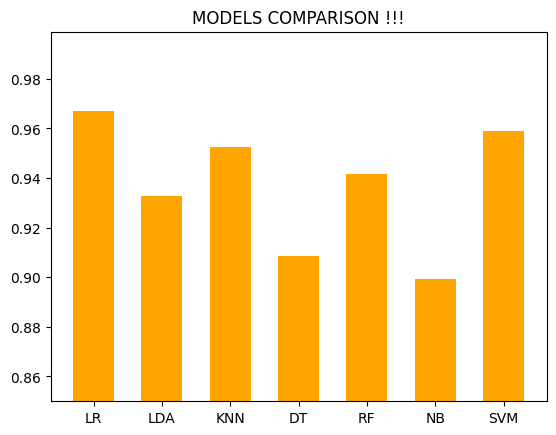

In [35]:
# MAKING A LIST OF THE MODELS WE WILL BE EVALUATING

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

pyplot.ylim(.850, .999)
pyplot.bar(names, res, color ='orange', width = 0.6)

pyplot.title('MODELS COMPARISON !!!')
pyplot.show()

In [27]:
from sklearn.linear_model import LogisticRegression
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cf = confusion_matrix(Y_test,y_pred)
score = accuracy_score(Y_test,y_pred)



print(cf)
print('ACCURACY !!!')
print(round(score*100,2))

[[71  0]
 [ 2 41]]
ACCURACY !!!
98.25
